In [1]:
from sys import path as syspath
from pathlib import Path

syspath.append(str(Path().home() / "pyref" / "src"))

import pyref as rf
import seaborn as sns
import matplotlib.pyplot as plt

db = rf.db()

# Optical Constant Database

* This is not a real database
* Relationships are handled by a .json file
* The json file location is saved to a config file in the module directory


In [2]:
# rf.init_db(path_to_your_db)

# Oriented Optical Constants From NEXAFS (Or DFT)

The `pyref` module provides a simple interface to our database of nexafs data, and to the DFT calculations that we use to simulate it. Additionaly, it provides a simple interface for calculating the optical constants from the DFT calculations. This is done using the `AngleNexafs` class, which is a subclass of the `DataFrame` class. This class overloades the generation method to accept file names as well as the standard `DataFrame` inputs. The `AngleNexafs` class also provides a method for calculating the optical constants from the DFT calculations. This is done using a series of methods. 

The first step is to load the data from a file.


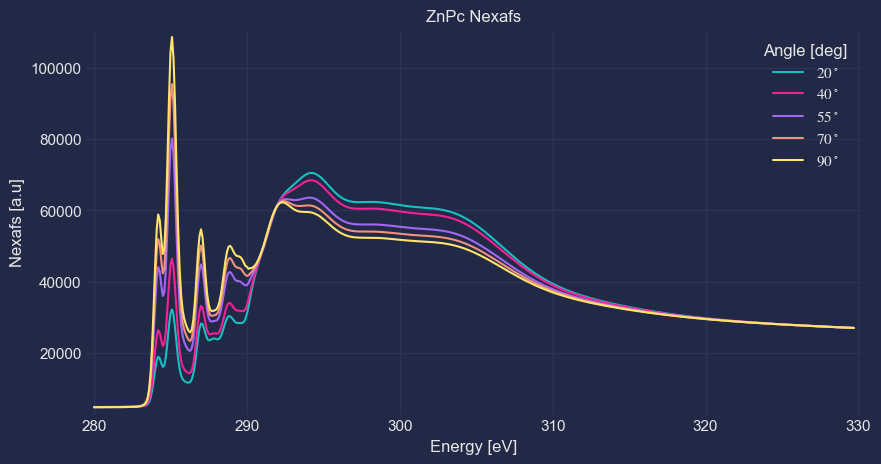

In [3]:
f = db / ".data" / "nexafs" / "C32H16N8Zn.raw"
dft = rf.AngleNexafs(f, "C32H16N8Zn", density=1.6, name = "ZnPc")  # type: ignore
dft.plot_ar()

Now that this is done, we compute the difference spectra of the data. As a standard, we use the first and last energies to compute the difference spectra. This is done using the `get_diffspec` method. This method adds a new collumn to the dataframe called 'Diff'. 

,20,40,55,70,90,Diff
Energy [eV],,,,,,
279.999586,4793.8398,4787.5586,4773.2593,4766.6880,4761.0200,-20.5805
280.100006,4794.9214,4788.6357,4773.5957,4766.7251,4760.8813,-21.3257
280.199906,4796.2891,4789.6636,4774.0200,4766.9688,4760.8457,-22.2691
280.299378,4797.5137,4790.8784,4774.6538,4767.3296,4761.0391,-22.8599
280.399842,4799.3608,4792.2939,4775.4473,4767.8291,4761.2002,-23.9135
...,...,...,...,...,...,...
329.300188,27068.4240,27067.0210,27063.5920,27062.0530,27060.7270,-4.8320
329.399116,27048.8110,27047.4430,27044.1990,27042.7170,27041.4650,-4.6120
329.500178,27029.4380,27028.1290,27025.0180,27023.6070,27022.3890,-4.4200


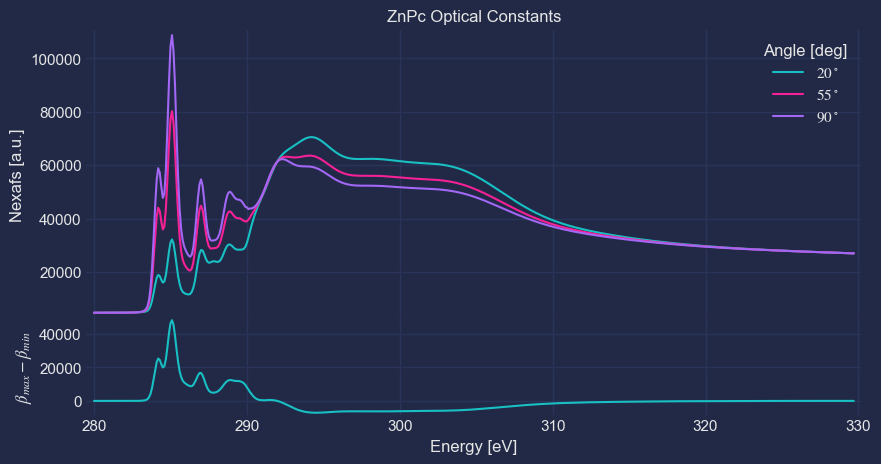

In [4]:
dft.get_diffspec()
dft

## Calculating the oriented optical constants

,20,40,55,70,90,Diff,$\beta_{zz}$,$\beta_{xx}$,$\beta_{iso}$,$\delta_{ba}$,$\beta_{ba}$
Energy [eV],,,,,,,,,,,
279.999586,4793.8398,4787.5586,4773.2593,4766.6880,4761.0200,-20.5805,0.000244,0.000249,0.000247,0.001344,0.000266
280.100006,4794.9214,4788.6357,4773.5957,4766.7251,4760.8813,-21.3257,0.000243,0.000249,0.000247,0.001331,0.000266
280.199906,4796.2891,4789.6636,4774.0200,4766.9688,4760.8457,-22.2691,0.000243,0.000249,0.000247,0.001318,0.000266
280.299378,4797.5137,4790.8784,4774.6538,4767.3296,4761.0391,-22.8599,0.000243,0.000249,0.000247,0.001305,0.000265
280.399842,4799.3608,4792.2939,4775.4473,4767.8291,4761.2002,-23.9135,0.000243,0.000249,0.000247,0.001291,0.000265
...,...,...,...,...,...,...,...,...,...,...,...
329.300188,27068.4240,27067.0210,27063.5920,27062.0530,27060.7270,-4.8320,0.001400,0.001401,0.001401,0.002198,0.001308
329.399116,27048.8110,27047.4430,27044.1990,27042.7170,27041.4650,-4.6120,0.001399,0.001400,0.001400,0.002198,0.001307
329.500178,27029.4380,27028.1290,27025.0180,27023.6070,27022.3890,-4.4200,0.001398,0.001399,0.001399,0.002197,0.001306


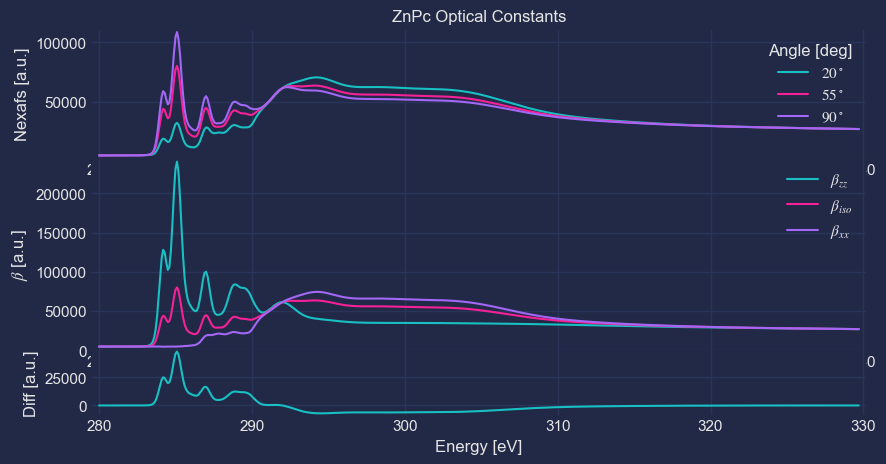

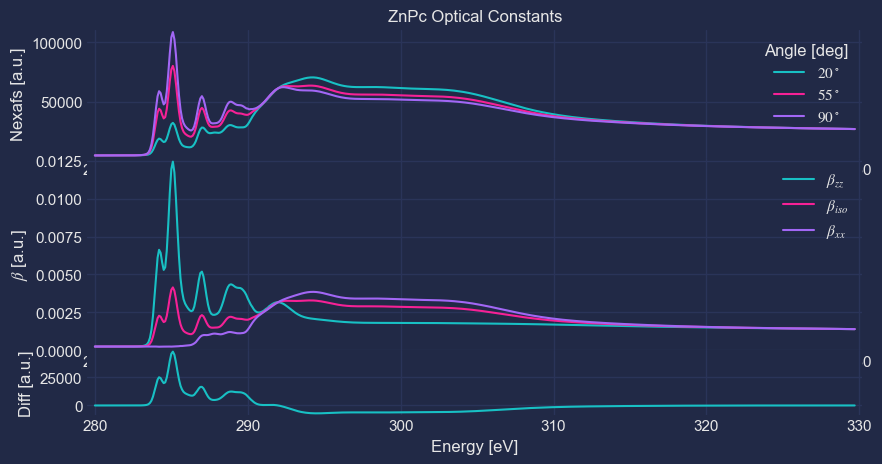

In [5]:
dft.get_ooc(normalize=False) # You can skip this step if you use the default normalize = True
# However, these are not in the same units as optical constants should be
# So instead, we need to normalize the spectra to the bare atom sectra
dft.normalize()
dft.plot_beta()
dft

## Kramers Kronig Transformation

The `get_kk()` method implements the kramers kronig transformation from the `kkcalc` module to calculate the calculate $\delta$. This creates a series of functions that return $\delta$ and $\beta$ for each principle axis (`delta_xx`, `beta_xx`, `delta_zz`, `beta_zz`), the average axis (`delta_iso`, `beta_iso`). These are generated via linear interpolation using the extended energy domain. Additionally, optical constants are calculated over the experimental energy range and added to the dataframe. 

,20,40,55,70,90,Diff,$\beta_{zz}$,$\beta_{xx}$,$\beta_{iso}$,$\delta_{ba}$,$\beta_{ba}$,$\delta_{xx}$,$\delta_{zz}$,$\delta_{iso}$
Energy [eV],,,,,,,,,,,,,,
279.999586,4793.8398,4787.5586,4773.2593,4766.6880,4761.0200,-20.5805,0.000244,0.000249,0.000247,0.001344,0.000266,0.001164,0.000378,0.000912
280.100006,4794.9214,4788.6357,4773.5957,4766.7251,4760.8813,-21.3257,0.000243,0.000249,0.000247,0.001331,0.000266,0.001155,0.000350,0.000898
280.199906,4796.2891,4789.6636,4774.0200,4766.9688,4760.8457,-22.2691,0.000243,0.000249,0.000247,0.001318,0.000266,0.001147,0.000322,0.000883
280.299378,4797.5137,4790.8784,4774.6538,4767.3296,4761.0391,-22.8599,0.000243,0.000249,0.000247,0.001305,0.000265,0.001139,0.000292,0.000867
280.399842,4799.3608,4792.2939,4775.4473,4767.8291,4761.2002,-23.9135,0.000243,0.000249,0.000247,0.001291,0.000265,0.001130,0.000261,0.000852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329.300188,27068.4240,27067.0210,27063.5920,27062.0530,27060.7270,-4.8320,0.001400,0.001401,0.001401,0.002198,0.001308,0.002812,0.002700,0.002776
329.399116,27048.8110,27047.4430,27044.1990,27042.7170,27041.4650,-4.6120,0.001399,0.001400,0.001400,0.002198,0.001307,0.002813,0.002701,0.002777
329.500178,27029.4380,27028.1290,27025.0180,27023.6070,27022.3890,-4.4200,0.001398,0.001399,0.001399,0.002197,0.001306,0.002813,0.002702,0.002778


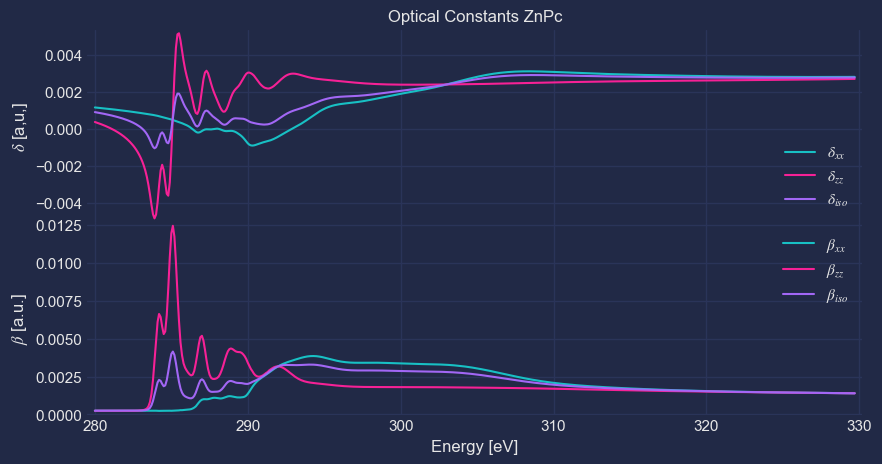

In [6]:
dft.get_kk()
dft.plot_delta_beta()
dft

Since the kramers kronig transformation produces a numerically interpolated function, we can calculate the orpical constants at every point across the measured absorbtion edge.

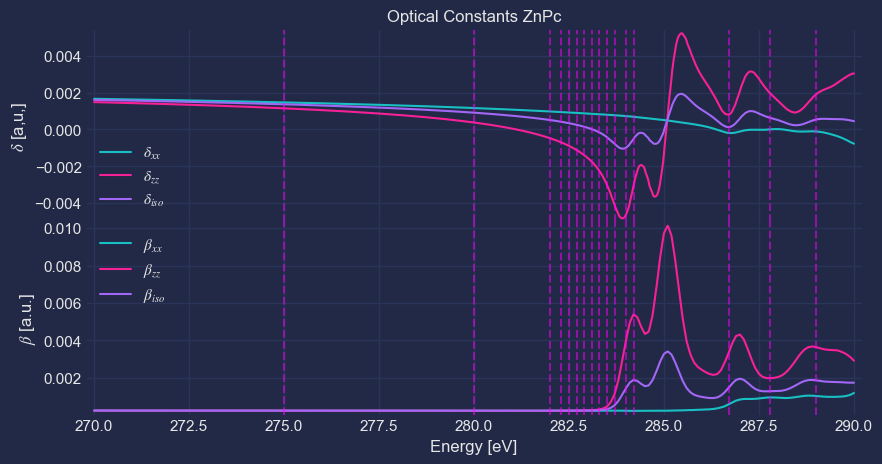

In [7]:
refl_energies = [275, 280, 282, 282.3, 282.5, 282.7, 282.9, 283.1, 283.3, 283.5, 283.7, 284, 284.2, 286.7, 287.8, 289]
dft.plot_delta_beta(en_range = (270,290), energy_highlights=refl_energies, dpi = 1500)

## Saving the data

The `to_db()` method saves the data to a "database"... In reality, it is just a special directory structure that is used to store the data. The directory structure is set up as follows:

### Dicectory Structure

```
.db 
    db.json
    - .data
        - nexafs
        - xrr
    - .ocs
    - .struct
```



In [8]:
dft.to_db()

## Loading Non Angle Resolved Data

By passing in the `angles = None` arguement, the `AngleNexafs` class will load the data as a standard `DataFrame` object. This is useful for loading data from the database for use in other applications. You can then additionally apply all kramers kronig transformations to the data.

C:\Users\hduva\pyref\src\pyref\core\frame.py:350: UserWarning: Normalizing only the isotropic data. NEXAFS is likely only one angle.
  warnings.warn("Normalizing only the isotropic data. NEXAFS is likely only one angle.")


,55,$\beta_{iso}$,$\delta_{ba}$,$\beta_{ba}$,$\delta_{iso}$
Energy [eV],,,,,
271.0,1561.709667,0.000087,0.001552,0.000127,0.001375
272.0,3028.180676,0.000168,0.001477,0.000125,0.001334
273.0,3274.064203,0.000182,0.001389,0.000123,0.001318
274.0,2816.274775,0.000156,0.001284,0.000121,0.001287
275.0,2316.852812,0.000128,0.001181,0.000119,0.001231
...,...,...,...,...,...
388.0,24892.641674,0.001380,0.002031,0.001079,0.002820
390.0,24656.825696,0.001367,0.002019,0.001060,0.002833
392.0,24457.622897,0.001356,0.002007,0.001041,0.002841


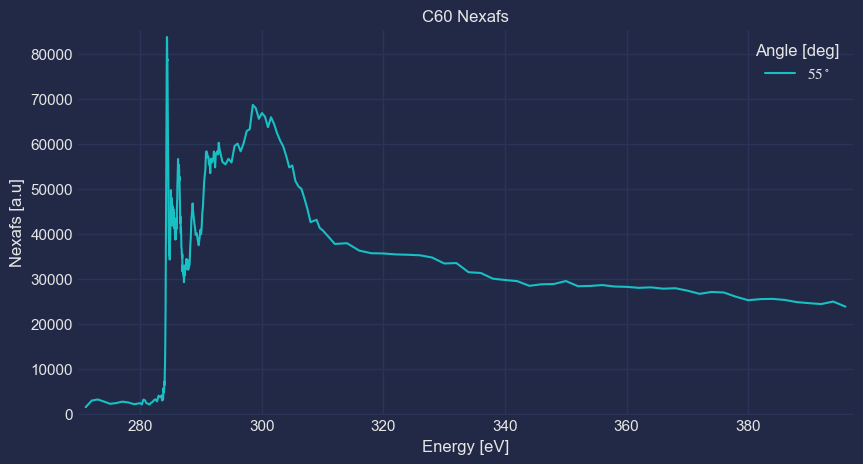

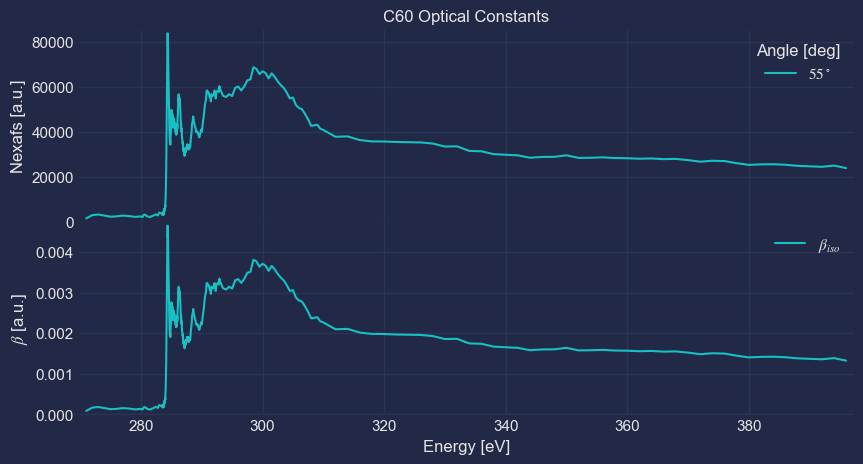

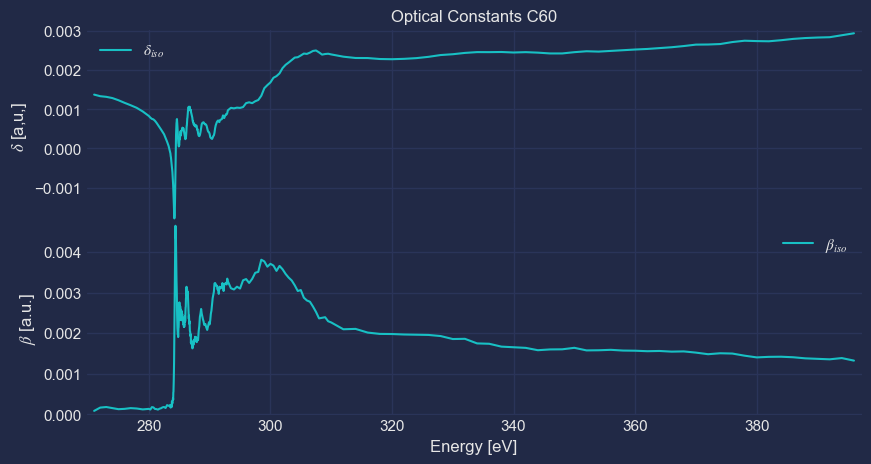

In [9]:
c60_f = db / ".data" / "nexafs" / "C60.raw"
C60 = rf.AngleNexafs(c60_f, molecular_name = "C60", density=1.65, name = "C60", angles = None, read_kwargs={"sep": "\t"}) # type: ignore
C60.plot_ar()

# apply kk
C60.get_ooc()
C60.get_kk()
C60.plot_delta_beta()
C60.to_db()
C60

# Loading Other Materials

The above method uses the `pyref` module to load the data. This is a simple interface to the `pandas` moduel. In some instances, it is easier to load the data directly from the `pandas` module.

,$\beta_{iso}$,$\delta_{iso}$
Energy [eV],,
10.0000,2.830563e-01,-3.955647e-01
10.1617,2.892839e-01,-9.213715e-02
10.3261,2.956436e-01,-4.841477e-02
10.4931,3.021468e-01,-2.923568e-02
10.6628,3.087919e-01,-2.098633e-02
...,...,...
28135.1000,2.284680e-11,3.103671e-07
28590.1990,2.129574e-11,3.005673e-07
29052.6000,1.985096e-11,2.910797e-07


Text(0.5, 1.0, 'Optical Constants PS')

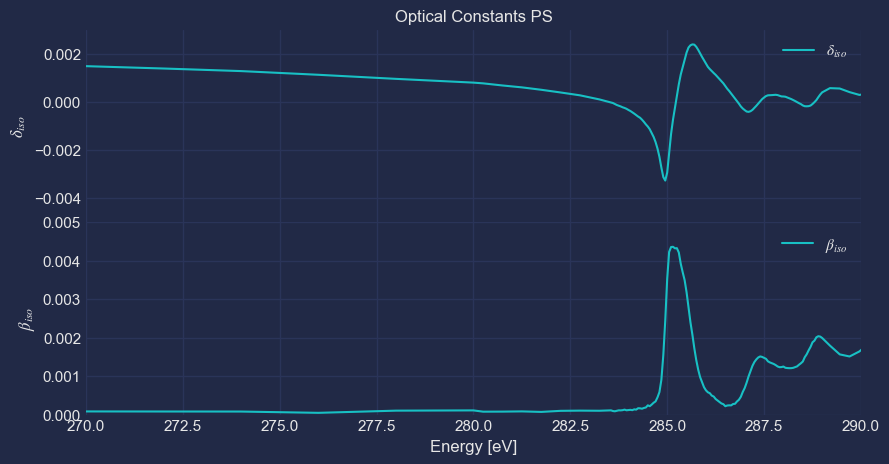

In [10]:
import pandas as pd

PS = pd.read_csv(db / ".data" / "nexafs" / "PS.raw", index_col = 0, sep = "\t", names = [r"$\beta_{iso}$", r"$\delta_{iso}$"], skiprows = 1)
PS.index.name = "Energy [eV]"
display(PS)

fig, ax = plt.subplots(nrows = 2, sharex = True, gridspec_kw={"height_ratios": [1, 1], "hspace": 0})
PS.plot(ax = ax[0], y = r"$\delta_{iso}$", xlim = (270, 290), ylim = (-0.005, 0.003))
PS.plot(ax = ax[1], y = r"$\beta_{iso}$", xlim = (270, 290), ylim = (0, 0.005))

ax[0].set_ylabel(r"$\delta_{iso}$")
ax[1].set_ylabel(r"$\beta_{iso}$")
ax[1].set_xlabel("Energy [eV]")
ax[0].set_title("Optical Constants PS")

In this example, the data is loaded from a csv file where the kramers kronig transforms are allready calculated. Luckily, C60 is a simple material, so we wont be needing orientation data. 

Now, we can plot and compare all the oriented optical constants for the C60 | ZnPc bilayer. 

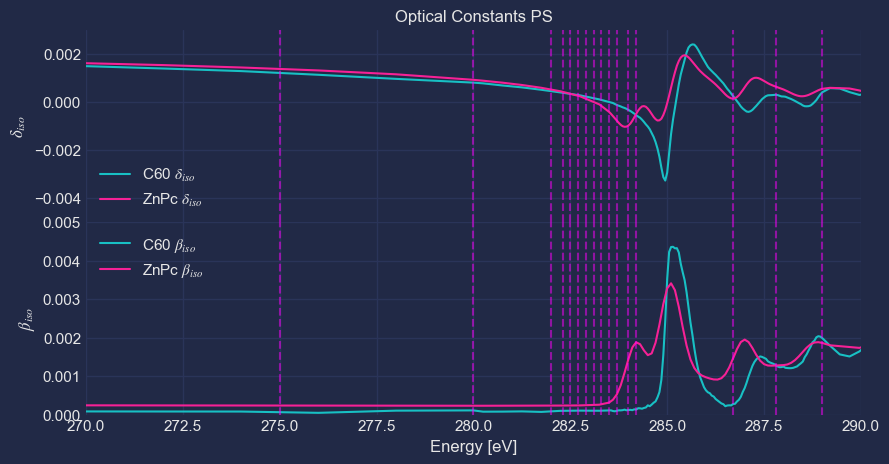

In [11]:
fig, ax = plt.subplots(nrows = 2, sharex = True, gridspec_kw={"height_ratios": [1, 1], "hspace": 0})
PS.plot(ax = ax[0], y = r"$\delta_{iso}$", xlim = (270, 290), ylim = (-0.005, 0.003))
PS.plot(ax = ax[1], y = r"$\beta_{iso}$", xlim = (270, 290), ylim = (0, 0.005))

ens = PS.index.values

ax[0].plot(ens, dft.iso.delta(ens))
ax[1].plot(ens, dft.iso.beta(ens))

ax[0].set_ylabel(r"$\delta_{iso}$")
ax[1].set_ylabel(r"$\beta_{iso}$")
ax[1].set_xlabel("Energy [eV]")
ax[0].set_title("Optical Constants PS")

for en in refl_energies:
    ax[0].axvline(en, color = "magenta", linestyle = "--", alpha = 0.5)
    ax[1].axvline(en, color = "magenta", linestyle = "--", alpha = 0.5)

ax[0].legend([r"C60 $\delta_{iso}$", r"ZnPc $\delta_{iso}$"])
ax[1].legend([r"C60 $\beta_{iso}$", r"ZnPc $\beta_{iso}$"])

## Loading the pandas dataframes into the database

To load a pandas dataframe into the database, we use `df_to_db()`. This method takes a dataframe and a name as inputs. The name is used to create a directory in the database. The dataframe is saved similarly to the `to_db()` method.

In [12]:
rf.df_to_db(PS, "PS", "iso")